# C++ Debugging

# 1. Syntax Errors

    #include <iostream>

    int main( // missing closing brace
    {
        int 1x; // variable name can't start with number
        std::cout << "Hi there"; << x +++ << '\n'; // extraneous semicolon, operator+++ does not exist
        return 0 // missing semicolon at end of statement
    }

# 2. Semantic Errors
## 2.1 Compile-Time 

    int main()
    {
        5 = x; // x not declared, cannot assign a value to 5
        return "hello"; // "hello" cannot be converted to an int
    }

## 2.2 Run-Time
### 2.2.1 Crashing (divide-by-zero-)
    #include <iostream>

    int main()
    {
        int a { 10 };
        int b { 0 };
        std::cout << a << " / " << b << " = " << a / b << '\n'; // division by 0 is undefined in mathematics
        return 0;
    }


### 2.2.2 Wrong Value or Behaviour: Undefined Result
Using undefined variables

    #include <iostream>

    int main()
    {
        int x; // no initializer provided
        std::cout << x << '\n'; // Use of uninitialized variable leads to undefined result

        return 0;
    }



### 2.2.3 Wrong Value or Behaviour: Incorrect Definition

    #include <iostream>

    int add(int x, int y) // this function is supposed to perform addition
    {
        return x - y; // but it doesn't due to the wrong operator being used
    }

    int main()
    {
        std::cout << "5 + 3 = " << add(5, 3) << '\n'; // should produce 8, but produces 2

        return 0;
    }

### 2.2.4 Wrong Value or Behaviour: Code Not Executed

    #include <iostream>

    int main()
    {
        return 0; // function returns here

        std::cout << "Hello, world!\n"; // so this never executes
    }

# 3. Debugging Process
# 3.1 Print via `std::err` 
Use `std::err` (not `std::cout`, as it may be buffered)
- Start of Functions Definitions: 
    - `std::cerr << "getValue() called\n"`
- For Each Variable: 
    - `std::cerr << "main::x = " << x;`

# 3.2 Preprocessor Directives
Debug as 3.1, then add **preprocessor directives** by:
- `#define XYZ_123`
- `#ifdef XYZ_123` before the:
    - `std:err` statements
- `#endif` and after


# 3.3 MiniProject: 
Project Features:
- create `take_input()` as function in `main()`
- call `take_input()` to take user input
- **print** to console
- add `std::err`
    - beginning of each function
    - user input variable
- add **preprocessor** directives
    - uncommented out
    - commented out

# 4. Integrated Debugger
## 4.1 Stepping Into & Over
Start Debugger with `F11`:
- `F11`  (debug): step line by line (& into functions)
- `F10`  (debug): step over (execute whole functions)
- `Shift+F11` (debug): step out current-function
- `Shift+F5` (debug): stop
- `F5` (debug): continue to end of program
- `Ctrl+F10`: run to cursor
- `F9`: break-point
- `F5`: start from beginning until break point or end of program
- `Ctrl+Shift+F10` (debug): **set next statment** or jump (forwards or backwards) to line


## 4.2 Watching Variables
`Shift+F9`: QuickWatch...

# 5. Call Stack (debugger)
The **call stack** is:  
- list of **active functions**
- that have been ***called*** to get to
- **current point of execution**

When a function is called:
- function is added to **top** of call stack.

When current function returns to caller:
- it is **removed** from top of stack.

## 5.1 **call stack window**
`f9`: add breakpoints  
`f5`: start debugger  
`ctrl+alt+c`: view call-stack  
- Line 1: Current point of execution (`a()` is top of stack
- Line 2: Line to be ***returned*** (when control returns to function)

Next:
- `f5`: Continue, then `b()` is top of stack,
- `f5`: Continue, `b()` calls `a()`, so `a()` is top of stack.

Screenshot shows 3 functions on the call stack, (from bottom to top):
- `main()` ---> called ---> fn `b()`, then 
- `b()` ---> called ---> fn `a()`

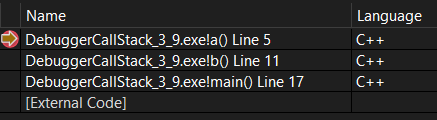

## 5.2 Example: 3 Functions in Call Stack
- `main()` -> calls `a()` -> returns `main()`
- `main()` -> calls `b()` -> currently in `b()`

|Call Stack     |Function   |Line       |
|-|-|-|
|Entry Line     |`b()`      |`15`       |
|Return Line    |`main()`      |`25`       |


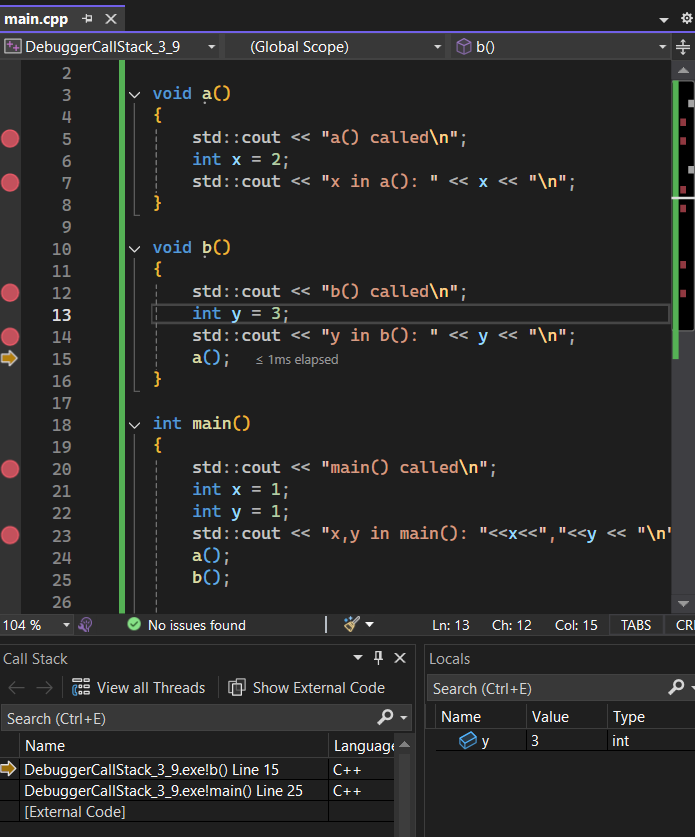

## 5.3: 2 Level Deep

Next:
- calls `b()` -> calls `a()`

## 5.4 Expected Table

|Call Stack     |Function   |Line       |
|---------------|-----------|-----------|
|Entry Line     |`a()`      |`5`        |
|Return Line 1  |`b()`      |`15`       |
|Return Line 2  |`main()`   |`25`       |

## 5.5 Actual Table (Matching OK!)

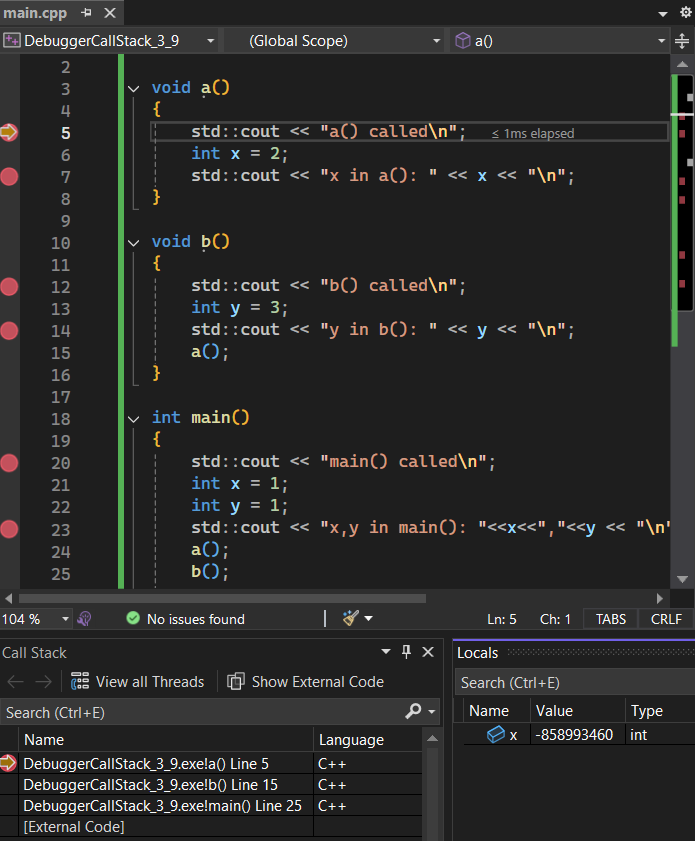


# 6. Static Analysis Tool
**static**: means tools analyze the source code without executing it.

- `Alt+F11`: Build > Run Code Analysis on Solution.
- `Ctrl+\,E`: Error List -> Messages
- `Ctrl+.`: Quick-Action (suggested update)

# 7. Data Types
When you give an object a value, 
- the compiler and CPU take care of 
- **encoding** your value 
- into the appropriate **sequence of bits** 
- for that **data type**, which are 
- then stored in **memory** (remember: memory can only store bits). 

For example, 
- ***assigning*** integer object the value 65
- is ***converted*** to sequence of bits `0100 0001` 
- ***stored*** in the **memory** assigned to the object.

|Types	|Category|	Meaning|	Example|
|-|-|-|-|
|float<br>double<br>long double| Floating Point|	a number with a fractional part|3.14159|
|bool	|Integral (Boolean)	|true or false|	true|
|char<br>wchar_t<br>char8_t (C++20)<br>char16_t (C++11)<br>char32_t (C++11)|	Integral (Character)|	a single character of text|	'c'|
|short int<br>int<br>long int<br>long long int (C++11)	|Integral (Integer)	|positive and negative whole numbers, including 0|	64|
|std::nullptr_t (C++11)	|Null Pointer	|a null pointer	|nullptr|
|void	|Void|	no type|	n/a|

## 7.1 `Void` Type
The compiler knows about the existence of such types, 
- but does not have enough information 
- to determine **how much memory** to allocate for objects of that type.

## 7.2 Object Sizes

A single object may use 1, 2, 4, 8, or even more consecutive memory addresses.
- The **amount of memory** that an object uses 
- is based on its **data type**.

### 7.2.1 Compiler
The compiler is able to 
- hide the details of how many bytes a given object uses from us. 
- When we access some variable `x`
    - the compiler knows how many bytes of data need to be retrieved (based on the type of variable x), and 
    - will output the appropriate machine language code to handle that detail for us.

### 7.2.2 How many values can an object hold?

|Bits   |Values|
|-------|------|
|1-bit  | $2^1$|
|2-bits | $2^2$|
|3-bits | $2^3$|
|n-bits | $2^n$|
 
Therefore 8-bits = $2^8$ = 256 values.  

An object, holding 16-bits = $2^16$ = 65,536 values.

## 7.3 Modern Architectures
General Assumptions:
- a byte is 8 bits
- Memory is bytes addressable (Each byte is memory independent)
- Floating point support (IEEE-754 compliant)
- 32-bit or 64-bit architecture

Ref: https://en.cppreference.com/w/cpp/language/types.html

### 7.3.1 Getting Byte & Type Size
- `#include <climits>`: allow import of `CHAR_BIT` (bits of byte)
- `#include <iomanip>`: for `setw` (setting width) 
    - `std::cout << std::left;` // left justify output
    - `std::cout << std::setw(16) << "bool:" << sizeof(bool) << " bytes\n";`
    - `sizeof()`: shows number of bytes of a type/object.

Others:
- `std::fixed`: disables scientific notation.
- `std::setprecision(0)` → no decimal places.

### 7.3.2 Note on Peformance
We may assume:
- types that use **less** memory 
- would be ***faster*** than types 
- that use **more** memory. 
- This is **not always true**. 

### 7.3.3 CPUs
CPUs are often ***optimized***:
- to process data of a **certain size** (e.g. 32 bits), and 
- types that match that size may be **processed quicker**. 

On such a machine, 
- `a 32-bit int` could be **faster** 
- than a `16-bit short` or an `8-bit char`.

### 7.3.3 Signed Variables
`n-bit` **signed** varaible has range from:
- $-(2^{n-1})$ to
- $+(2^{n-1}-1)$.

### 7.3.4 Unsigned Variables
An `n-bit` **unsigned** variable has a range of:
- $0$ to 
- $(2^n-1)$.

Use-cases:
- well-suited for networking and systems **with little memory**
- because unsigned integers can store **more positive numbers**
- **without** taking up extra memory


# 7.4 Unsigned Integer Overflow

If an unsigned value is out of range:
- the value it is ***divided*** by **one greater** 
- than the **largest number of the type**, 
- and only the **remainder** kept.

#### 7.4.1 Attempting to store value `280` to 1-one byte type
- Step 1: 
    - Current Max of 1-byte type: 1 byte range is `255`
    - Add 1 type: `255` + `1` = `256`
    - Divide origina value by above: `280/256`
        - Equals `1` remainder `24`
        - Keep `24` and store it.


# 7.5 Unsigned + Signed Integers
In C++, if a mathematical operation (e.g. arithmetic or comparison) has: 
- **one signed integer** and 
- **one unsigned integer**, 
- Result: 
    - signed integer ---> converted ---> to an 
    - **unsigned integer**.

# 7.6 Rank

**Rank** is a concept used in the **usual arithmetic conversions** to decide how to convert operands of different integer types so that operations like addition, subtraction, or comparison can be done safely.

| Rank (increasing order)                |
| -------------------------------------- |
| `bool`                                 |
| `char`, `signed char`, `unsigned char` |
| `short`, `unsigned short`              |
| `int`, `unsigned int`                  |
| `long`, `unsigned long`                |
| `long long`, `unsigned long long`      |

Ref: https://eel.is/c++draft/conv.rank

# 7.6.1 Different Types
When two operands have different types, the usual arithmetic conversions apply:

If ranks different:
- **lower rank operand** ---> type of **higher_rank_operand**.

If ranks same && different signed: 
- check if unsigned type can represent all values of the signed type:
    - If yes → signed converted to unsigned
    - If no → both converted to the unsigned version of the signed type.

`static_cast<int>(x)`: unsigned char to int

# 8. Fixed Width Integers and `size_t`

In [1]:
# Values for 8, 16, 32, and 64 bits
print(2**8, 2**16, 2**32, 2**64)

256 65536 4294967296 18446744073709551616


# 100. Research Later
- `std::err` vs `std::cout`: in terms of buffering